# Project : Work with 65 years dataset for Rainfall Analysis in Bangladesh.

In [1]:
# importing the necessary libraries

import pandas as pd
import gc
import numpy as np
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score , KFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from xgboost import plot_importance
import statsmodels.regression.linear_model as sm

In [2]:
# load the dataset

df = pd.read_csv('65 Years of Weather Data Bangladesh (1948 - 2013).csv')
print('Dataset Size is {0} MB'.format(df.memory_usage().sum()/1024**2))

Dataset Size is 2.7393798828125 MB


In [3]:
df.isnull().sum()

Station Names        0
YEAR                 0
Month                0
Max Temp             0
Min Temp             0
Rainfall             0
Relative Humidity    0
Wind Speed           0
Cloud Coverage       0
Bright Sunshine      0
Station Number       0
X_COR                0
Y_COR                0
LATITUDE             0
LONGITUDE            0
ALT                  0
Period               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21120 entries, 0 to 21119
Data columns (total 17 columns):
Station Names        21120 non-null object
YEAR                 21120 non-null int64
Month                21120 non-null int64
Max Temp             21120 non-null float64
Min Temp             21120 non-null float64
Rainfall             21120 non-null float64
Relative Humidity    21120 non-null float64
Wind Speed           21120 non-null float64
Cloud Coverage       21120 non-null float64
Bright Sunshine      21120 non-null float64
Station Number       21120 non-null int64
X_COR                21120 non-null float64
Y_COR                21120 non-null float64
LATITUDE             21120 non-null float64
LONGITUDE            21120 non-null float64
ALT                  21120 non-null int64
Period               21120 non-null float64
dtypes: float64(12), int64(4), object(1)
memory usage: 2.7+ MB


In [5]:
df.head().transpose()

,0,1,2,3,4
Station Names,Barisal,Barisal,Barisal,Barisal,Barisal
YEAR,1949,1950,1951,1952,1953
Month,1,1,1,1,1
Max Temp,29.4,30,28.2,26.6,30
Min Temp,12.3,14.1,12.3,12.3,13.3
Rainfall,0,0,0,2,10
Relative Humidity,68,77,77,77,75
Wind Speed,0.453704,0.453704,0.453704,0.453704,0.453704
Cloud Coverage,0.6,0.8,0.6,1,1.6
Bright Sunshine,7.83191,7.83191,7.83191,7.83191,7.83191


In [6]:
# # delete some columns
# new_df = df.drop(['Max Temp' , 'Min Temp' , 'Bright Sunshine' , 'Period'] , axis = 1)
# print('Dataset Size is {0} MB'.format(new_df.memory_usage().sum()/1024**2)

In [7]:
df.columns

Index(['Station Names', 'YEAR', 'Month', 'Max Temp', 'Min Temp', 'Rainfall',
       'Relative Humidity', 'Wind Speed', 'Cloud Coverage', 'Bright Sunshine',
       'Station Number', 'X_COR', 'Y_COR', 'LATITUDE', 'LONGITUDE', 'ALT',
       'Period'],
      dtype='object')

In [8]:
labelencoder_X = LabelEncoder()
df['Station Names']= labelencoder_X.fit_transform(df['Station Names'])

In [9]:
df.head()

,Station Names,YEAR,Month,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Station Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01
1,0,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1950.01
2,0,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1951.01
3,0,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1952.01
4,0,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1953.01


#### Divided the dataset into train and test.

In [10]:
df_train, df_test = train_test_split(df , train_size = 0.75, test_size = 0.25, random_state = 80)

In [11]:
df_train

,Station Names,YEAR,Month,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Station Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
17095,27,1997,7,32.7,24.1,983.0,92.000000,2.300000,6.6,3.300000,41964,650012.1,488627.9,22.50,91.46,6,1997.07
20004,32,1956,7,35.0,24.6,872.0,87.245614,1.512963,7.1,3.719231,41891,694533.2,752277.9,24.88,91.93,35,1956.07
14671,23,1995,10,34.5,24.8,289.0,85.000000,0.600000,3.8,6.100000,41960,534986.1,472575.7,22.36,90.34,3,1995.10
925,1,1967,4,36.4,22.7,80.0,78.000000,3.100000,3.0,6.948485,41951,567637.6,510271.8,22.70,90.66,5,1967.04
17325,27,1987,12,29.0,16.6,22.0,77.000000,0.700000,1.3,8.000000,41964,650012.1,488627.9,22.50,91.46,6,1987.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8714,13,1980,10,32.6,24.4,387.0,83.000000,1.300000,2.7,6.493103,41963,616159.2,465295.1,22.29,91.13,4,1980.10
2259,3,1975,3,36.1,19.6,1.0,70.000000,1.000000,0.8,6.889189,41941,568556.9,571945.8,23.26,90.67,7,1975.03
19366,30,2000,12,29.0,11.0,0.0,80.000000,0.300000,1.2,9.500000,41915,675761.6,687095.9,24.29,91.73,23,2000.12
5308,8,1994,10,34.0,24.0,88.0,79.000000,0.800000,2.9,6.900000,41992,705183.0,374324.6,21.46,91.98,4,1994.10


In [12]:
mm_scaler = MinMaxScaler()
features_names = ['Station Names' , 'YEAR' , 'Month' , 'Max Temp' , 'Min Temp' , 'Rainfall' , 'Relative Humidity' , 'Wind Speed' , 'Cloud Coverage' , 'Station Number' , 'X_COR' , 'Y_COR' , 'LATITUDE' , 'LONGITUDE' , 'ALT']
features_names

['Station Names',
 'YEAR',
 'Month',
 'Max Temp',
 'Min Temp',
 'Rainfall',
 'Relative Humidity',
 'Wind Speed',
 'Cloud Coverage',
 'Station Number',
 'X_COR',
 'Y_COR',
 'LATITUDE',
 'LONGITUDE',
 'ALT']

In [13]:
df_train[features_names] = mm_scaler.fit_transform(df_train[features_names])
df_test[features_names] = mm_scaler.fit_transform(df_test[features_names])

C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Mahmudur Limon\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [14]:
x_train = df_train
y_train = df_train.pop('Rainfall')


x_test = df_test
y_test = df_test.pop('Rainfall')

## Check the important columns.

In [15]:
lm = LinearRegression()
rfe = RFE(lm, 9)

In [16]:
rfe = rfe.fit(x_train , y_train)
print(rfe.support_)
print(rfe.ranking_) 

[False False False  True  True  True  True  True  True  True False False
  True  True False False]
[3 8 4 1 1 1 1 1 1 1 5 2 1 1 6 7]


In [17]:
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, n_features_to_select=9)             
rfe = rfe.fit(x_train, y_train)

In [18]:
y_pred = rfe.predict(x_test)
ac_mlr = r2_score(y_test, y_pred)
print(ac_mlr*100)

63.39975610973481


Only 63% accuracy.Let's check with cross validation for better result.

In [19]:
lm = LinearRegression()
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=5)
print(np.max(scores))

0.6635429135145086


After doing cross validation the score increase not much.Now do some hyperparameter tunning.

In [20]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select': list(range(1 , 12))}]

In [21]:
# lm = LinearRegression()
# lm.fit(x_train, y_train)        

# model_cv = GridSearchCV(estimator = lm , param_grid = hyper_params, scoring= 'r2', cv = folds, return_train_score=True , n_jobs = -1)      

# model_cv.fit(x_train, y_train)   

#### Now check which columns are important for better result

Using Ordinary Least Squares or OLS to find out the best columns.

In [22]:
new_x_train = x_train
new_x_train = np.append(arr = np.ones((15840 , 1)).astype(int) , values = x_train , axis = 1)
lm_OLS = sm.OLS(endog = y_train , exog = x_train).fit()
lm_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Rainfall   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     1944.
Date:                Tue, 21 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:17:16   Log-Likelihood:                 20057.
No. Observations:               15840   AIC:                        -4.008e+04
Df Residuals:                   15824   BIC:                        -3.996e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Station Names         0.0126      0.002      6.099      0.000       0.009       0.017
YEAR                 -0.0124      0.002     -5.419      0.000      -0.017      -0.008
Month                -0.0086      0.002     -4.167      0.000      -0.013      -0.005
Max Temp              0.0115      0.007      1.658      0.097      -0.002       0.025
Min Temp             -0.0253      0.006     -3.917      0.000      -0.038      -0.013
Relative Humidity     0.0730      0.007     10.358      0.000       0.059       0.087
Wind Speed            0.0706      0.007     10.235      0.000       0.057       0.084
Cloud Coverage        0.2362      0.005     43.318      0.000       0.226       0.247
Bright Sunshine      -0.0158      0.001    -29.469      0.000      -0.017      -0.015
Station Number       -0.1667      0.018     -9.498      0.000      -0.201      -0.132
X_COR                -0.0059      0.018     -0.328      0.743      -0.041       0.029
Y_COR                -0.0107      0.012     -0.879      0.379      -0.035       0.013
LATITUDE             -0.1755      0.020     -8.840      0.000      -0.214      -0.137
LONGITUDE             0.0732      0.010      7.479      0.000       0.054       0.092
ALT                  -0.0006      0.004     -0.163      0.871      -0.008       0.007
Period                0.0001   1.05e-05      9.832      0.000    8.26e-05       0.000
==============================================================================
Omnibus:                     6065.421   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50292.486
Skew:                           1.617   Prob(JB):                         0.00
Kurtosis:                      11.108   Cond. No.                     1.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

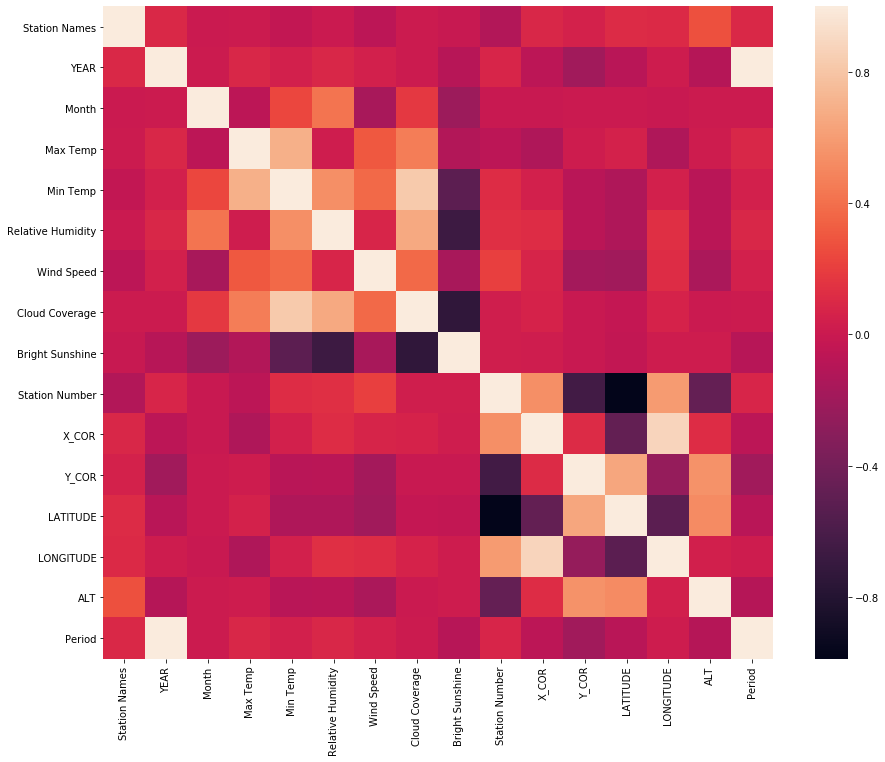

In [23]:
plt.figure(figsize = (15 , 12))
sns.heatmap(x_train.corr())

#### It is a thumb rule that if the P value is greater than 5% than delete those columns.According to that there are 4 columns have high P value and also 3 of them have negetive co-efficient value.So now delete 3 columns


In [24]:
new_x_train = x_train
new_x_train = new_x_train.drop((['X_COR' , 'Y_COR' , 'ALT']) , axis = 1)
new_x_train.head()

,Station Names,YEAR,Month,Max Temp,Min Temp,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Station Number,LATITUDE,LONGITUDE,Period
17095,0.794118,0.753846,0.545455,0.446078,0.828704,0.912281,0.205357,0.835443,3.300000,0.757143,0.334016,0.783784,1997.07
20004,0.941176,0.123077,0.545455,0.558824,0.851852,0.828870,0.135086,0.898734,3.719231,0.235714,0.821721,0.910811,1956.07
14671,0.676471,0.723077,0.818182,0.534314,0.861111,0.789474,0.053571,0.481013,6.100000,0.728571,0.305328,0.481081,1995.10
925,0.029412,0.292308,0.272727,0.627451,0.763889,0.666667,0.276786,0.379747,6.948485,0.664286,0.375000,0.567568,1967.04
17325,0.794118,0.600000,1.000000,0.264706,0.481481,0.649123,0.062500,0.164557,8.000000,0.757143,0.334016,0.783784,1987.12


In [25]:
new_x_trai = np.append(arr = np.ones((15840 , 1)).astype(int) , values = new_x_train , axis = 1)
lm_OLS = sm.OLS(endog = y_train , exog = new_x_train).fit()
lm_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Rainfall   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     2427.
Date:                Tue, 21 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:17:17   Log-Likelihood:                 20050.
No. Observations:               15840   AIC:                        -4.007e+04
Df Residuals:                   15827   BIC:                        -3.997e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Station Names         0.0128      0.002      6.509      0.000       0.009       0.017
YEAR                 -0.0106      0.002     -4.759      0.000      -0.015      -0.006
Month                -0.0085      0.002     -4.123      0.000      -0.013      -0.004
Max Temp              0.0114      0.007      1.653      0.098      -0.002       0.025
Min Temp             -0.0254      0.006     -3.939      0.000      -0.038      -0.013
Relative Humidity     0.0728      0.007     10.355      0.000       0.059       0.087
Wind Speed            0.0723      0.007     10.536      0.000       0.059       0.086
Cloud Coverage        0.2358      0.005     43.394      0.000       0.225       0.246
Bright Sunshine      -0.0159      0.001    -29.586      0.000      -0.017      -0.015
Station Number       -0.1590      0.017     -9.308      0.000      -0.192      -0.126
LATITUDE             -0.1737      0.018     -9.886      0.000      -0.208      -0.139
LONGITUDE             0.0681      0.003     24.079      0.000       0.063       0.074
Period             9.575e-05   9.64e-06      9.937      0.000    7.69e-05       0.000
==============================================================================
Omnibus:                     6066.222   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50360.299
Skew:                           1.617   Prob(JB):                         0.00
Kurtosis:                      11.115   Cond. No.                     8.98e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

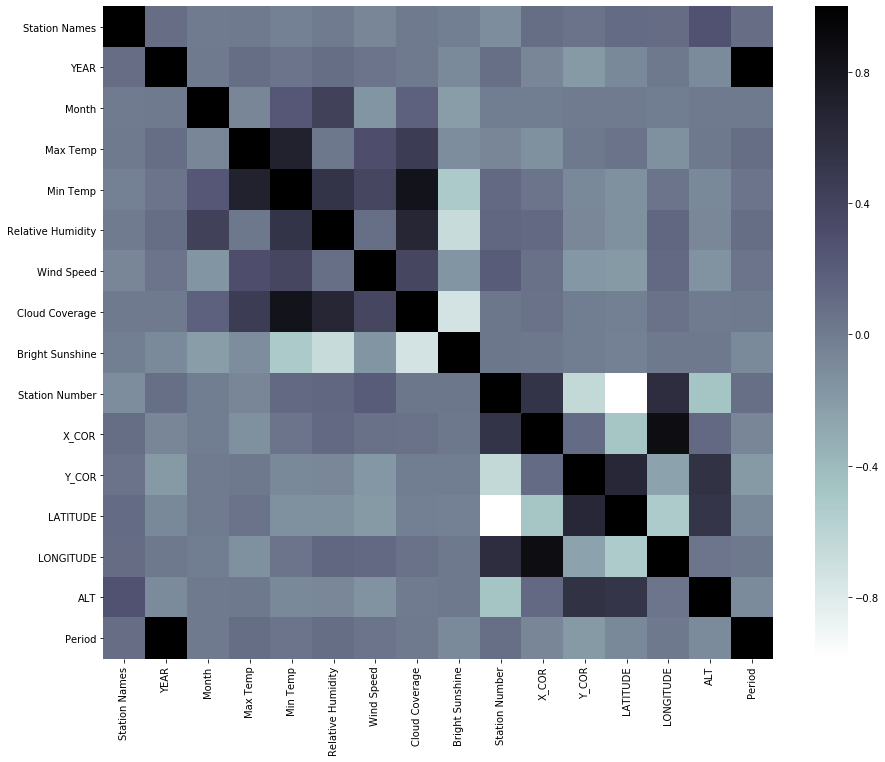

In [26]:
plt.figure(figsize = (15 , 12))
sns.heatmap(x_train.corr() , cmap = 'bone_r')

## Apply Different ML model

### Simple Linear Regression

In [ ]:
new_x_tr = x_train.pop('YEAR')
new_x_tr1 = x_train.pop('X_COR')
new_x_tr2 = x_train.pop('ALT')

new_x_ts = x_test.pop('YEAR')
new_x_ts1 = x_test.pop('X_COR')
new_x_ts2 = x_test.pop('ALT')

In [29]:
new_x_test = x_test.drop((['X_COR' , 'Y_COR' , 'ALT']) , axis = 1)
new_x_test.shape

(5280, 13)

In [31]:
lm = LinearRegression()
lm.fit(new_x_train, y_train)

y1 = lm.predict(new_x_test)
print(r2_score(y_test , y1))

0.6349438814948298


In [33]:
print('After Cross validation: ')
lm = LinearRegression()
new_scores = cross_val_score(lm, new_x_train , y_train, scoring='r2', cv=5)
print(np.max(new_scores*100))

After Cross validation: 
66.3060409851114


### KNN

In [40]:
knn = KNeighborsRegressor(n_neighbors = 8)
knn.fit(new_x_train , y_train)

y_pred_knn = knn.predict(new_x_test)

ac = r2_score(y_test , y_pred_knn)
print(ac*100)

61.892284801318034


In [41]:
knn = KNeighborsRegressor()
scores = cross_val_score(knn, new_x_train, y_train, cv=200)
print(np.max(scores))

0.8358621972328679


In [42]:
n_folds = 5
parameters = {
        'n_neighbors': range (2 , 50 , 2)
        }

In [43]:
knn = KNeighborsRegressor()

tree = GridSearchCV(estimator = knn , param_grid = parameters , cv = n_folds , n_jobs = -1)
tree.fit(new_x_train , y_train)

score1 = tree.cv_results_

print(pd.DataFrame(score1).head())
print(tree.best_params_)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.041090      0.000747         0.096481        0.012027   
1       0.036065      0.004007         0.082428        0.003111   
2       0.034251      0.004934         0.094027        0.005701   
3       0.033835      0.003745         0.145747        0.027206   
4       0.064227      0.008239         0.131764        0.015472   

  param_n_neighbors               params  split0_test_score  \
0                 2   {'n_neighbors': 2}           0.572361   
1                 4   {'n_neighbors': 4}           0.624458   
2                 6   {'n_neighbors': 6}           0.639465   
3                 8   {'n_neighbors': 8}           0.640211   
4                10  {'n_neighbors': 10}           0.641253   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.599910           0.592338           0.625821           0.647351   
1           0.642307           0.641524           0.6620

In [45]:
## Apply with best neighbors

knn = KNeighborsRegressor(n_neighbors = 6)
knn.fit(new_x_train , y_train)

y_pred_knn = knn.predict(new_x_test)

ac_knn = r2_score(y_test , y_pred_knn)
print('After Cross-validation: ',ac*100)

After Cross-validation:  61.892284801318034
